<a href="https://colab.research.google.com/github/daliarod96/LEAL-Carbon-case-study-exercise/blob/main/co2variables_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# **Transportation, income, and population data**

For each U.S. state, I gathered public and personal transportation data spanning the years 1991-2020. I also found data on population size.

### **Variables**:
*   **Year**: 1991-2020.

*   **State**: 50 states + D.C.

*   **Public Transit Vehicle Revenue Miles (VRM)**: Annual miles that (public transit) vehicles are scheduled to or actually travel while in revenue service. [1](https://www.transit.dot.gov/ntd/national-transit-database-ntd-glossary#V)

*   **Vehicle Miles Traveled (VMT)**: Annual vehicle miles traveled. [2](https://www.fhwa.dot.gov/policyinformation/statistics/2020/)

*   **Gasoline (gal)**: Highway use of gasoline, gallons. [3](https://www.fhwa.dot.gov/policyinformation/statistics/2020/mf226.cfm)

*   **Special fuel (gal)**: Private and commercial highway use of special fuels (biodiesel, blended biodiesel, and natural gas), gallons. [4](https://afdc.energy.gov/laws/10938#:~:text=Special%20fuel%20is%20defined%20as,%2C%20industrial%2C%20or%20farm%20purposes.) [5](https://www.fhwa.dot.gov/policyinformation/statistics/2020/mf225.cfm)

*   **Population**: Intercensal estimates. [6](https://www.census.gov/data/tables/time-series/demo/popest/intercensal-2000-2010-state.html) [7](https://www.census.gov/programs-surveys/popest/technical-documentation/research/evaluation-estimates/2020-evaluation-estimates/2010s-state-total.html) [8](https://www.census.gov/data/tables/time-series/demo/popest/intercensal-1990-2000-state-and-county-totals.html)

* **State code**: integer from 0-51.


In [2]:
# Source: https://www.transit.dot.gov/ntd/data-product/ts22-service-data-and-operating-expenses-time-series-system-0
df = pd.read_excel("/content/drive/MyDrive/LEAL CarbonTracker/TS2.2 Service Data and Operating Expenses Time Series by System.xlsx", sheet_name = 'VRM')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC', 'FL','GA',
          'HI','ID','IL','IN','IA','KS','KY','LA','ME','MD',
          'MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
          'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC',
          'SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']

In [4]:
state_names = ["Alabama","Alaska", "Arizona", "Arkansas", "California",
               "Colorado", "Connecticut", "Delaware", "District of Columbia",
               "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana",
               "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland",
               "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri",
               "Montana", "Nebraska", "Nevada", "New Hampshire","New Jersey", "New Mexico",
               "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma",
               "Oregon", "Pennsylvania", "Rhode Island", "South Carolina",
               "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia",
               "Washington","West Virginia", "Wisconsin", "Wyoming"]

In [5]:
co2variables = pd.DataFrame()

In [6]:
for state in states:
  year = 1991
  for i in range(15,45):
    dic = {'State' : [state],
            'Year' : [year],
            'Public transit vehicle revenue miles': [df[df.State == state].iloc[:,i].sum()]
            }
    df2 = pd.DataFrame.from_dict(dic)
    co2variables = pd.concat([co2variables, df2], ignore_index=True)
    year+=1

In [7]:
vmt = pd.read_excel("/content/drive/MyDrive/LEAL CarbonTracker/vehicle-miles-traveled-millions.xlsx")

In [8]:
gasoline_gals = pd.read_excel("/content/drive/MyDrive/LEAL CarbonTracker/highway-use-of-gasoline-thousands-of-gallons.xlsx")

In [9]:
# source: https://www.fhwa.dot.gov/policyinformation/statistics/2020/mf225.cfm
special_fuel_gals = pd.read_excel("/content/drive/MyDrive/LEAL CarbonTracker/highway-use-of-special-fuel-thousands-of-gallons.xlsx")

In [10]:
population = pd.read_excel("/content/drive/MyDrive/LEAL CarbonTracker/population.xlsx")

In [11]:
co2variables['Vehicle miles traveled'] = vmt.drop(['State', 1990], axis=1).to_numpy().flatten()
co2variables['Gasoline (gal)'] = gasoline_gals.drop(['state', 1990], axis=1).to_numpy().flatten()
co2variables['Special fuel (gal)'] = special_fuel_gals.drop(['state', 1990], axis=1).to_numpy().flatten()
co2variables['Population'] = population.drop(['state', 1990], axis=1).to_numpy().flatten()
co2variables['Vehicle miles traveled'] = co2variables['Vehicle miles traveled']*1000000 # change units from million miles traveled to miles traveled
co2variables['Gasoline (gal)'] = co2variables['Gasoline (gal)']*1000 # change units from thousand gals to gals
co2variables['Special fuel (gal)'] = co2variables['Special fuel (gal)']*1000 # change units from thousand gals to gals

In [ ]:
co2variables.State = pd.Categorical(co2variables.State)
co2variables['State code'] = co2variables.State.cat.codes

# **Consumer expenditures data**

For each U.S. state, I extracted data about personal consumer expenditures spanning the years 1997-2020. [9](https://www.bea.gov/data/consumer-spending/state). Every variable is in U.S. dollars.

### **Variables (in US dollars):**
* **Personal Consumption Expenditures**: total consumption expenditures in a year in U.S. dollars

* **Motor vehicles and parts**: Net purchases of used motor vehicles, motor vehicle parts and accessories.

* **Furnishings and durable household equipment**: Furniture and furnishings, household appliances, glassware, tableware, and household utensils, tools and equipment for house and garden.  

* **Recreational goods and vehicles**: audio, video, photographic, information processing equipment and media, sports, guns, ammunition, books, musical instruments, jewelry, watches, therapeutic appliances and equipment, luggage, cellphones and related communication equipment.

* **Food and beverages purchased for off-premises consumption**: food, beverages, and alcohol for off-premises consumption (i.e.,groceries); food produced and consumed on farms

* **Clothing and footwear**

* **Gasoline and other energy goods**": Fuels, fuel oil, other fuels, lubricant, and fluids.

* **Other nondurable goods**: Pharmaceutical and medical products, recreational items, household supplies, personal care products, tobacco, magazines, newspapers, stationery, expenditures abroad.

* **Water supply and sanitation**: Household utilities.

* **Electricity**: Household utilitiies.

* **Natural gas**: Household utilities.

* **Ground transportation**: Public transportation.

* **Air transportation**: Public transportation.

* **Water transportation**: Public transportation.

* **Recreation services**: Memberships, audio-video, photographic, and information processing services, gambling, etc.

* **Health care**: Outpatient and in-patient services.

* **Food services**: purchased meals and beverages, meals purchased for employees.

* **Accommodations**: hotel, airbnb, etc.

* **Financial services and insurance**: financial services furnished without payment; financial service charges, fees, and commissions; life, household, and health insurance.


In [12]:
consumer_expenditures = pd.read_csv("/content/drive/MyDrive/LEAL CarbonTracker/SAPCE3__ALL_AREAS_1997_2021.csv")

In [13]:
consumption = ['Personal consumption expenditures ',
               '   Motor vehicles and parts ',
               '   Furnishings and durable household equipment ',
               '   Recreational goods and vehicles ',
               '   Food and beverages purchased for off-premises consumption ',
               '   Clothing and footwear ',
               '   Gasoline and other energy goods ',
               '   Other nondurable goods ',
               '     Water supply and sanitation ',
               '      Electricity ',
               '      Natural gas ',
               '     Ground transportation ',
               '     Air transportation ',
               '     Water transportation ',
               '   Recreation services ',
               '   Health care ',
               '    Food services ',
               '    Accommodations ',
               '   Financial services and insurance '
               ]

In [14]:
for c in consumption:
  co2variables[c] = np.nan
  for name, abbrv in zip(state_names, states):
    query = (consumer_expenditures.GeoName == name) & (consumer_expenditures.Description == c)
    for year in range(1997,2021):
      val = consumer_expenditures.at[consumer_expenditures[query].index[0], str(year)]
      query2 = (co2variables['State'] == abbrv) & (co2variables['Year'] == year)
      co2variables.at[co2variables[query2].index[0], c] = val

In [15]:
co2variables.iloc[:,1:] = co2variables.iloc[:,1:].apply(lambda x: pd.to_numeric(x, errors='coerce') )

<ipython-input-15-b36f7fd68827>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  co2variables.iloc[:,1:] = co2variables.iloc[:,1:].apply(lambda x: pd.to_numeric(x, errors='coerce') )


In [17]:
# missing value interpolation
co2variables.iloc[:,7:] = co2variables.iloc[:,7:].interpolate(method='spline', limit_direction='backward', order=2 )

/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


#**Emissions data**

The United States Environmental Protection Agency has a dataset of state-level annual greenhouse gas emissions per sector (energy, agriculture, etc.) spanning the years 1991-2020 in million metric tons of CO2 equivalents or CO2e using 100-year GWPs (Global Warming Potential) [10](https://www.epa.gov/ghgemissions/state-ghg-emissions-and-removals). I extracted this data to obtain my dependent variable.

### **Variables:**
* **Emissions**: total CO2, MH4, N2O emissions in metric tons of CO2 equivalent.

In [18]:
co2variables['Emissions'] = np.nan

In [19]:
co2emissions = pd.read_excel("/content/drive/MyDrive/LEAL CarbonTracker/AllStateGHGData_042623.xlsx", sheet_name ='Data by UNFCCC-IPCC Sectors')

In [20]:
# for each US State and year from 1991-2020, store c02 emissions
code = 1
for state in states:
  for year in range(1991,2021):
    val = co2emissions[co2emissions['STATE'] == state][f'Y{year}'].sum()
    query = (co2variables['State'] == state) & (co2variables['Year'] == year)
    co2variables.at[co2variables[query].index[0], 'Emissions'] = val

In [21]:
co2variables['Emissions'] = co2variables['Emissions'] *1000000 # change units from million metric tons to metric tons of CO2 equivalent

In [22]:
co2variables.head()

,State,Year,Public transit vehicle revenue miles,Vehicle miles traveled,Gasoline (gal),Special fuel (gal),Population,Personal consumption expenditures,Motor vehicles and parts,Furnishings and durable household equipment,...,Ground transportation,Air transportation,Water transportation,Recreation services,Health care,Food services,Accommodations,Financial services and insurance,State code,Emissions
0,AL,1991,9291795.0,42924000000,2050458000,554649000.0,4099156,82238.863015,6728.429008,2548.082658,...,32.037677,522.987845,-11.425892,3378.057799,4229.699846,4781.183420,290.787420,2504.075029,1,1.102844e+08
1,AL,1992,9693226.0,45762000000,2125176000,551926000.0,4154014,78326.532144,5916.528760,2362.208817,...,66.545312,454.202539,-3.567572,3157.879596,6319.527091,4387.055368,325.463468,2958.644244,1,1.162543e+08
2,AL,1993,9710908.0,47203000000,2165688000,587390000.0,4214202,75634.602722,5306.841766,2225.112074,...,97.093518,403.245538,3.341411,2989.835124,8123.510605,4088.145231,355.817206,3399.555911,1,1.214317e+08
3,AL,1994,8651242.0,48956000000,2220444000,659025000.0,4260229,74163.074750,4899.368027,2136.792431,...,123.682296,370.116843,9.301057,2873.924381,9641.650390,3884.453007,381.848634,3826.810029,1,1.261710e+08
4,AL,1995,7901294.0,50628000000,2283380000,696427000.0,4296800,73911.948227,4694.107542,2097.249886,...,146.311645,354.816453,14.311365,2810.147369,10873.946444,3775.978697,403.557752,4240.406599,1,1.372881e+08


# **Personal Income data**

The U.S. Bureau of Economic Analysis provides annual state-level personal income (millions of dollars) statistics spanning the years 1958-2021
[11](https://apps.bea.gov/regional/downloadzip.cfm). As a substitute for median household income, which has a weak correlation with our emissions variable, I extracted the personal income variable and added it to the C02variables dataset.

**Variables**:
* **Personal income**: for a given year, in U.S. dollars

In [23]:
personal_income = pd.read_csv("/content/drive/MyDrive/LEAL CarbonTracker/SAINC30__ALL_AREAS_1958_2021.csv")

In [24]:
personal_income.columns

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [25]:
personal_income.Description.unique()

array(['Personal income (millions of dollars) ',
       'Net earnings by place of residence ',
       'Personal current transfer receipts ',
       ' Income maintenance benefits 1/',
       ' Unemployment insurance compensation ', ' Retirement and other ',
       'Dividends, interest, and rent ', ' Personal dividend income ',
       ' Personal interest income ', '  Imputed interest receipts 2/',
       '  Monetary interest receipts ', ' Rental income of persons ',
       '  Imputed rent ', '  Monetary rent ', 'Population (persons) 3/',
       'Per capita personal income 4/', 'Per capita net earnings 4/',
       'Per capita personal current transfer receipts 4/',
       ' Per capita income maintenance benefits 4/',
       ' Per capita unemployment insurance compensation 4/',
       ' Per capita retirement and other 4/',
       'Per capita dividends, interest, and rent 4/',
       ' Per capita dividends 4/', ' Per capita interest 4/',
       ' Per capita rent 4/', 'Earnings by place of w

In [26]:
personal_income.GeoName.unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest',
       'Rocky Mountain', 'Far West', nan], dtype=object)

In [27]:
co2variables['Personal income'] = np.nan

In [28]:
for name, abbrv in zip(state_names, states):
  query = (personal_income.GeoName == name) & (personal_income.Description == 'Personal income (millions of dollars) ')
  for year in range(1991,2021):
    val = personal_income.at[personal_income[query].index[0], str(year)]
    query2 = (co2variables['State'] == abbrv) & (co2variables['Year'] == year)
    co2variables.at[co2variables[query2].index[0], 'Personal income'] = val

In [29]:
co2variables['Personal income'] = co2variables['Personal income']*1000000 # change units from millions of U.S. dollars to U.S. dollars

# **Electricity consumption data**

We have information about the amount of money people spend on electricity annually, but we have no information on electricity in terms of a standard unit of measurement, kWhs. The EIA-861 Annual Electric Power Industry Report releases annual state-level data of the total megawatthours of electricity consumed at the residential level. I extracted this data for the years 1991-2020. [12](https://www.eia.gov/electricity/data/state/)

**Variables**:


* **Electricity (kWh)** Kilowatthours of retail electricity consumed annually


In [30]:
electricity1 = pd.read_excel("/content/drive/MyDrive/LEAL CarbonTracker/HS861 1990-2009.xlsx", sheet_name = "Total Electric Industry", skiprows = 2)
electricity2 = pd.read_excel("/content/drive/MyDrive/LEAL CarbonTracker/HS861 2010- .xlsx", sheet_name = "Total Electric Industry", skiprows = 2)

In [31]:
electricity = pd.concat([electricity1, electricity2], axis=0, ignore_index=True)

In [32]:
electricity = electricity.drop_duplicates(keep ='first')

In [33]:
co2variables = co2variables.drop_duplicates(keep ='first')

In [34]:
for state in states:
  for year in range(1991,2021):
    query = (electricity.STATE == state) & (electricity.Year == year)
    val = electricity.at[electricity[query].index[0], 'Megawatthours']
    query2 = (co2variables['State'] == state) & (co2variables['Year'] == year)
    co2variables.at[co2variables[query2].index[0], 'Electricity (kWh)'] = val

In [35]:
co2variables['Electricity (kWh)'] = co2variables['Electricity (kWh)'] * 1000 # change unit from megawatthours to kilowatthours

# **Natural Gas consumption data**

We have information about the amount of money people spend on gas annually, but we have no information on natural gas usage in terms of a standard unit of measurement, cubic feet . The EIA has an API which allowed me to extract state-level residential natural gas consumption statistics for the years 1991-2020. [13](https://www.eia.gov/opendata/browser/natural-gas/sum/lsum)

**Variables**:
* **Natural gas (CF)**: total annual natural gas consumption in cubic feet

In [36]:
key = "MYKEY"

In [37]:
url = "https://api.eia.gov/v2/natural-gas/sum/lsum/data/?frequency=annual&data[0]=value&facets[series][]=N3010AK2&facets[series][]=N3010AL2&facets[series][]=N3010AR2&facets[series][]=N3010AZ2&facets[series][]=N3010CA2&facets[series][]=N3010CO2&facets[series][]=N3010CT2&facets[series][]=N3010DC2&facets[series][]=N3010DE2&facets[series][]=N3010FL2&facets[series][]=N3010GA2&facets[series][]=N3010HI2&facets[series][]=N3010IA2&facets[series][]=N3010ID2&facets[series][]=N3010IL2&facets[series][]=N3010IN2&facets[series][]=N3010KS2&facets[series][]=N3010KY2&facets[series][]=N3010LA2&facets[series][]=N3010MA2&facets[series][]=N3010MD2&facets[series][]=N3010ME2&facets[series][]=N3010MI2&facets[series][]=N3010MN2&facets[series][]=N3010MO2&facets[series][]=N3010MS2&facets[series][]=N3010MT2&facets[series][]=N3010NC2&facets[series][]=N3010ND2&facets[series][]=N3010NE2&facets[series][]=N3010NH2&facets[series][]=N3010NJ2&facets[series][]=N3010NM2&facets[series][]=N3010NV2&facets[series][]=N3010NY2&facets[series][]=N3010OH2&facets[series][]=N3010OK2&facets[series][]=N3010OR2&facets[series][]=N3010PA2&facets[series][]=N3010RI2&facets[series][]=N3010SC2&facets[series][]=N3010SD2&facets[series][]=N3010TN2&facets[series][]=N3010TX2&facets[series][]=N3010UT2&facets[series][]=N3010VA2&facets[series][]=N3010VT2&facets[series][]=N3010WA2&facets[series][]=N3010WI2&facets[series][]=N3010WV2&facets[series][]=N3010WY2&start=1990&end=2023&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key=MYKEY"

In [38]:
r = requests.get(url)

In [39]:
r

<Response [403]>

In [40]:
data = r.json()

In [41]:
natural_gas = pd.DataFrame()

In [45]:
for response in data['response']['data']:
  natural_gas = pd.concat([natural_gas, pd.DataFrame([response])], ignore_index = True)

In [46]:
co2variables['Natural gas (CF)'] = np.nan

In [47]:
for state in states:
  for year in range(1991, 2021):
    query = (natural_gas.duoarea == f'S{state}') & (natural_gas.period == year)
    val = natural_gas.at[natural_gas[query].index[0], 'value']
    query2 = (co2variables['State'] == state) & (co2variables['Year'] == year)
    co2variables.at[co2variables[query2].index[0], 'Natural gas (CF)'] = val*1000000

# **Carbon Intensity data**

I gathered annual state-level carbon intensity data for the years 1991-2020 [14](https://www.eia.gov/environment/emissions/state/).

**Variables**:

*   **Carbon intensity**: CO2 emissions from each unit of energy in a year. in kilograms of energy-related carbon dioxide per million Btu.




In [43]:
carbon_intensity = pd.read_excel('/content/drive/MyDrive/LEAL CarbonTracker/carbon_intensity.xlsx', skiprows = 5)

In [44]:
for state, abbrv in zip(state_names, states):
  for year in range(1991, 2021):
    query = (carbon_intensity.State == state)
    val = carbon_intensity.at[carbon_intensity[query].index[0], year]
    query2 = (co2variables['State'] == abbrv) & (co2variables['Year'] == year)
    co2variables.at[co2variables[query2].index[0], 'Carbon intensity'] = val

# **Correlation matrix of co2variables columns**

<ipython-input-48-af626b2f3082>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = co2variables.corr()


<Axes: >

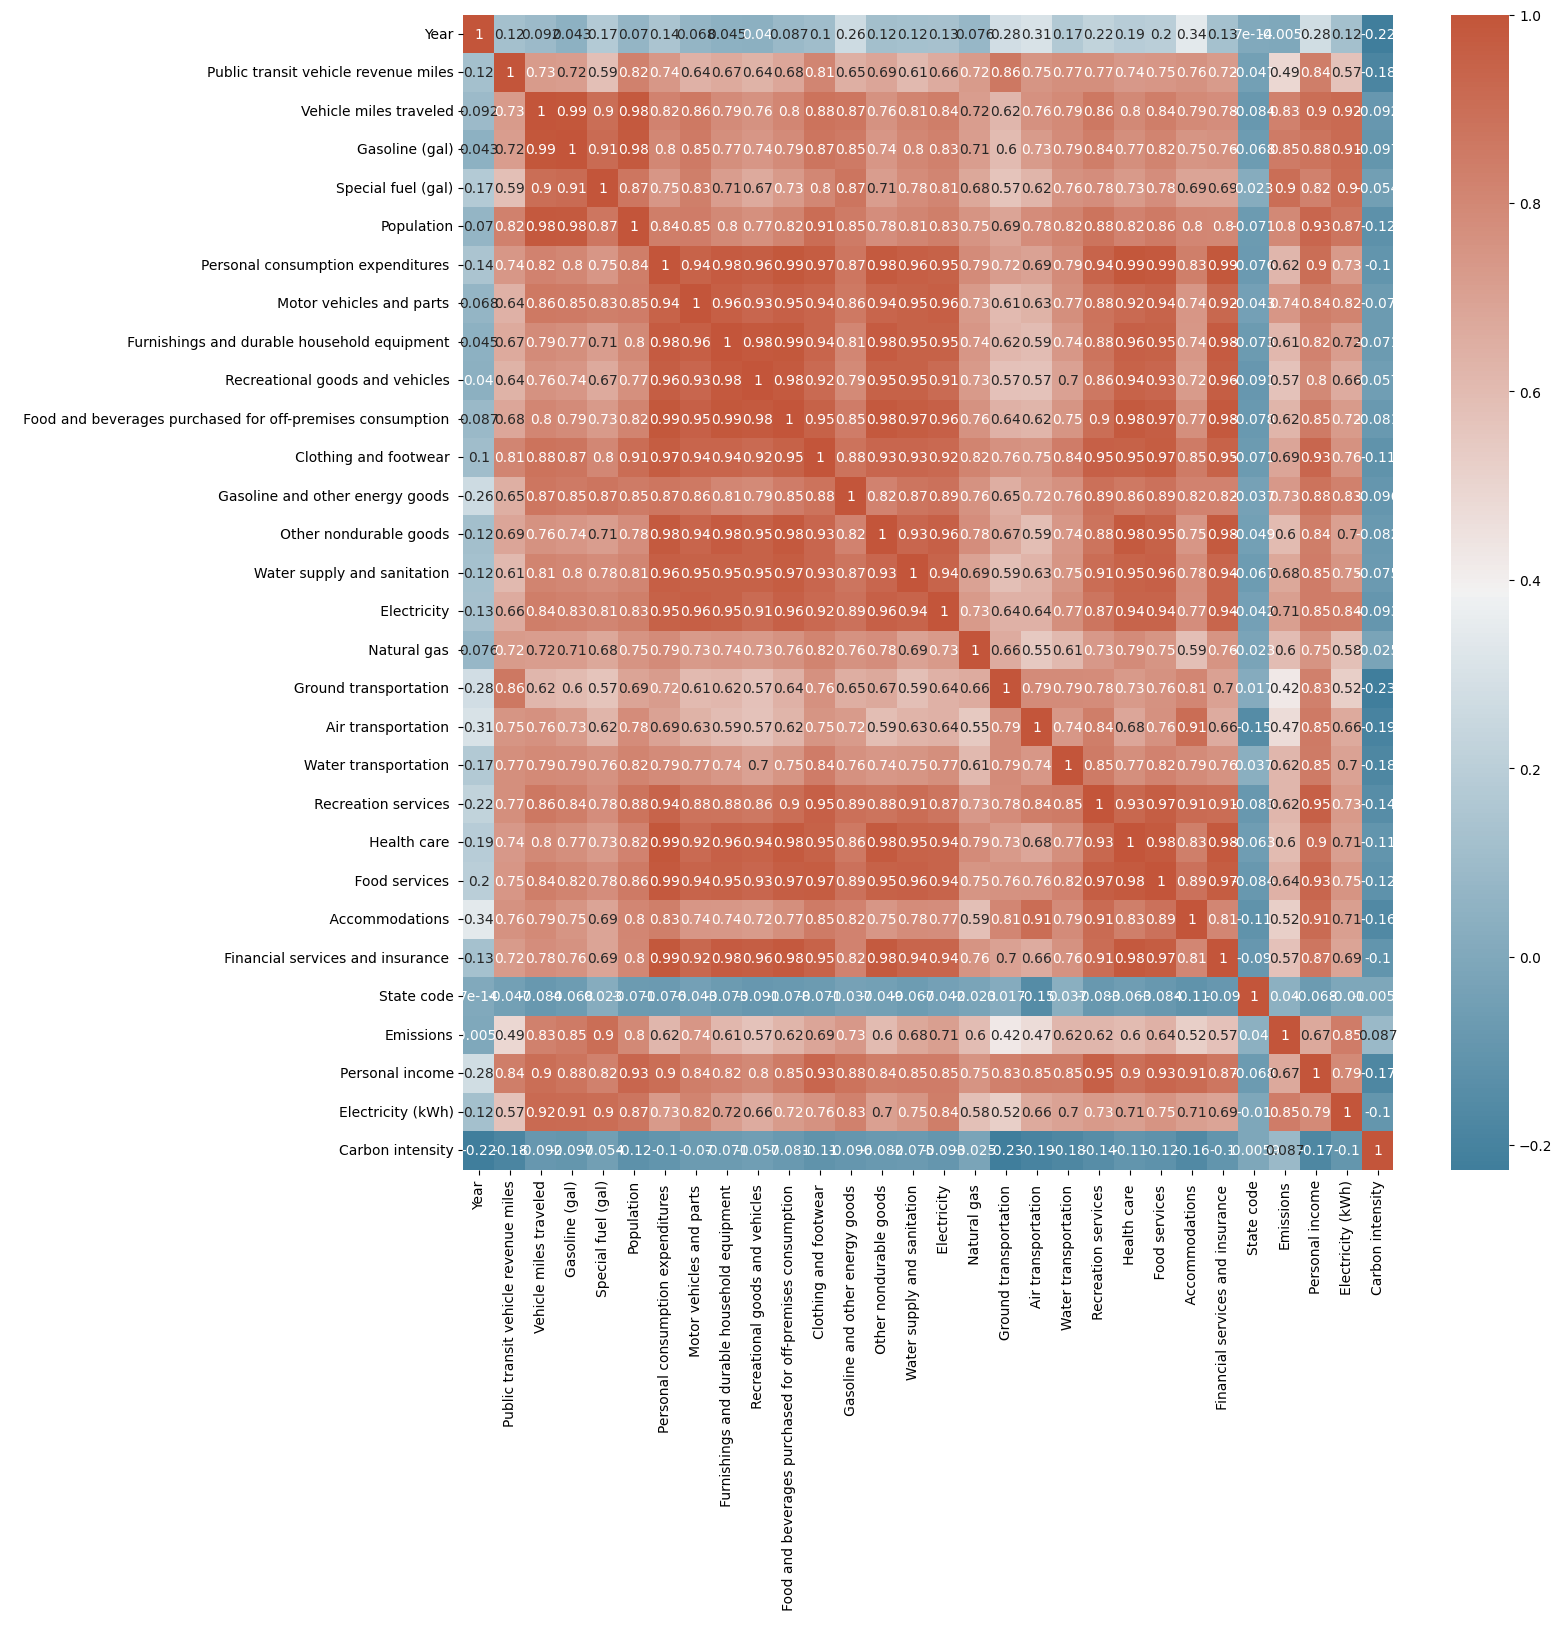

In [48]:
corr = co2variables.corr()
f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

Most of our features are highly correlated to the dependent variable, **Emissions**.This means we did a good job at finding key drivers carbon emissions. However, the features are also highly correlated with each other (collinearity) which makes it hard to asses which variables are statistically significant.

# **Save co2variables into CSV file**

In [49]:
co2variables.to_csv('/content/drive/MyDrive/LEAL CarbonTracker/co2variables.csv') # save my dataset to CSV file